In [1]:
#DATASETS ELEGIDO : Precios de materiales de la construcción en Argentina
#OBJETIVO: Análisis de la variación de precios de los materiales más relevantes desde el 2012 al 2023 (Anual y/o mensual)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
construccion= pd.read_csv("construccion.csv",encoding='ISO-8859-1')

In [3]:
construccion.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12199 entries, 0 to 12198
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sector_id                  12199 non-null  int64  
 1   sector_nombre              12199 non-null  object 
 2   variable_id                12199 non-null  int64  
 3   actividad_producto_nombre  12199 non-null  object 
 4   indicador                  12199 non-null  object 
 5   unidad_de_medida           12199 non-null  object 
 6   fuente                     12199 non-null  object 
 7   frecuencia_nombre          12199 non-null  object 
 8   cobertura_nombre           12199 non-null  object 
 9   alcance_tipo               12199 non-null  object 
 10  alcance_id                 12199 non-null  int64  
 11  alcance_nombre             12199 non-null  object 
 12  indice_tiempo              12199 non-null  object 
 13  valor                      12199 non-null  flo

In [4]:
construccion.columns #Vemos los nombres de las columnas

Index(['sector_id', 'sector_nombre', 'variable_id',
       'actividad_producto_nombre', 'indicador', 'unidad_de_medida', 'fuente',
       'frecuencia_nombre', 'cobertura_nombre', 'alcance_tipo', 'alcance_id',
       'alcance_nombre', 'indice_tiempo', 'valor'],
      dtype='object')

In [5]:
construccion.shape #El datasets tiene 12199 filas y 14 columnas

(12199, 14)

In [6]:
construccion.head() #primeras 5 filas

,sector_id,sector_nombre,variable_id,actividad_producto_nombre,indicador,unidad_de_medida,fuente,frecuencia_nombre,cobertura_nombre,alcance_tipo,alcance_id,alcance_nombre,indice_tiempo,valor
0,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-01-01,143.655158
1,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-02-01,135.174176
2,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-03-01,143.757175
3,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-04-01,135.200037
4,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-05-01,141.657020


In [7]:
construccion.tail(5) #ultimas 5 filas

,sector_id,sector_nombre,variable_id,actividad_producto_nombre,indicador,unidad_de_medida,fuente,frecuencia_nombre,cobertura_nombre,alcance_tipo,alcance_id,alcance_nombre,indice_tiempo,valor
12194,24,Construcción,402,Construcción,Valor Agregado Bruto a Precios Básicos,millones de pesos a precios corrientes,INDEC,Trimestral,Nacional,PAIS,200,Argentina,2022-01-01,2.371423e+06
12195,24,Construcción,402,Construcción,Valor Agregado Bruto a Precios Básicos,millones de pesos a precios corrientes,INDEC,Trimestral,Nacional,PAIS,200,Argentina,2022-04-01,2.611300e+06
12196,24,Construcción,402,Construcción,Valor Agregado Bruto a Precios Básicos,millones de pesos a precios corrientes,INDEC,Trimestral,Nacional,PAIS,200,Argentina,2022-07-01,3.484410e+06
12197,24,Construcción,402,Construcción,Valor Agregado Bruto a Precios Básicos,millones de pesos a precios corrientes,INDEC,Trimestral,Nacional,PAIS,200,Argentina,2022-10-01,3.823056e+06
12198,24,Construcción,402,Construcción,Valor Agregado Bruto a Precios Básicos,millones de pesos a precios corrientes,INDEC,Trimestral,Nacional,PAIS,200,Argentina,2023-01-01,5.376047e+06


In [8]:
construccion.dtypes #tipos de datos por columna

sector_id                      int64
sector_nombre                 object
variable_id                    int64
actividad_producto_nombre     object
indicador                     object
unidad_de_medida              object
fuente                        object
frecuencia_nombre             object
cobertura_nombre              object
alcance_tipo                  object
alcance_id                     int64
alcance_nombre                object
indice_tiempo                 object
valor                        float64
dtype: object

In [9]:
construccion['indice_tiempo'] = pd.to_datetime(construccion['indice_tiempo']) #agregamos las columnas de año y mes que se desglosan de la fecha
construccion['anio'], construccion['mes'] = construccion['indice_tiempo'].dt.year, construccion['indice_tiempo'].dt.month

In [10]:
construccion.head()

,sector_id,sector_nombre,variable_id,actividad_producto_nombre,indicador,unidad_de_medida,fuente,frecuencia_nombre,cobertura_nombre,alcance_tipo,alcance_id,alcance_nombre,indice_tiempo,valor,anio,mes
0,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-01-01,143.655158,2012,1
1,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-02-01,135.174176,2012,2
2,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-03-01,143.757175,2012,3
3,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-04-01,135.200037,2012,4
4,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-05-01,141.657020,2012,5


In [11]:
construccion.loc[:,'alcance_nombre'].unique() #traigo la clasificacion de los datos en la columna alcance_nombre

array(['Argentina', 'CAPITAL FEDERAL', 'BUENOS AIRES', 'CATAMARCA',
       'CORDOBA', 'CORRIENTES', 'CHACO', 'CHUBUT', 'ENTRE RIOS',
       'FORMOSA', 'JUJUY', 'LA PAMPA', 'LA RIOJA', 'MENDOZA', 'MISIONES',
       'NEUQUEN', 'RIO NEGRO', 'SALTA', 'SAN JUAN', 'SAN LUIS',
       'SANTA CRUZ', 'SANTA FE', 'SANTIAGO DEL ESTERO', 'TUCUMAN',
       'TIERRA DEL FUEGO'], dtype=object)

In [12]:
construccion.loc[:,'actividad_producto_nombre'].unique() 
#ICC: indice del costo de la construcción-mide las variaciones mensuales que experimenta el costo de la construcción de una 
#vivienda social tipo. El índice está compuesto por tres divisiones llamadas “Capítulos” que involucran los precios de 
#diferentes elementos. Estos son: “Materiales”, comprende los precios de 124 insumos; “Mano de Obra”, 6; y “Varios”, 11. 
#El conjunto total de los “Capítulos” se clasifica como “Nivel General”, el cual incluye los precios de los 141 elementos 
#enumerados previamente. Actualmente, la vivienda tipo está compuesta por cocina-comedor, dos dormitorios y baño. 
#La superficie cubierta es de 50,25 m2, la mampostería es de bloque cerámico con revoque grueso y fino, los pisos son de 
#cerámica y el techo de losa

array(['Artículos sanitarios de cerámica', 'Asfalto', 'Cales',
       'Cemento portland', 'Construcción',
       'Hierro redondo y aceros para la construcción',
       'Hormigón elaborado', 'ICC - Nivel general',
       'ISAC - Nivel general', 'ISAC - Resto', 'Ladrillos huecos',
       'Mano de obra', 'Materiales', 'Mosaicos graníticos y calcáreos',
       'Pinturas para construcción', 'Pisos y revestimientos cerámicos',
       'Placas de yeso', 'Yeso'], dtype=object)

In [13]:
construccion.loc[:,'unidad_de_medida'].unique() #las unidades de medida están relacionadas al producto

array(['índice base 2004=100', 'tn', 'puestos',
       'índice base dic 2004=100', 'millones de pesos a precios de 2004',
       'millones de pesos a precios corrientes'], dtype=object)

In [14]:
construccion.loc[:,'indicador'].unique() #El Indicador Sintético de la Actividad de la Construcción (ISAC) refleja la 
                                        #evolución del sector de la construcción a partir del comportamiento de un conjunto 
                                        #de insumos representativos(Asfalto, cales, cemento, griferias,etc)

array(['ISAC_desestacionalizada', 'ISAC_original', 'ISAC_tendencia-ciclo',
       'Consumo', 'Puestos de trabajo registrados sector privado',
       'Indice del Costo de la Construcción',
       'Valor Agregado Bruto a Precios Básicos'], dtype=object)

In [15]:
construccion.rename(columns={'actividad_producto_nombre':'producto','alcance_nombre':'alcance','sector_nombre':'sector','frecuencia_nombre':'frecuencia','cobertura_nombre':'cobertura','sector_id':'ID','variable_id':'variable','indice_tiempo':'fecha'},inplace=True)
#Cambiamos los nombres de las columnas

In [16]:
construccion.head()

,ID,sector,variable,producto,indicador,unidad_de_medida,fuente,frecuencia,cobertura,alcance_tipo,alcance_id,alcance,fecha,valor,anio,mes
0,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-01-01,143.655158,2012,1
1,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-02-01,135.174176,2012,2
2,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-03-01,143.757175,2012,3
3,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-04-01,135.200037,2012,4
4,24,Construcción,387,Artículos sanitarios de cerámica,ISAC_desestacionalizada,índice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-05-01,141.657020,2012,5


In [17]:
tn_cemento=construccion.loc[(construccion['unidad_de_medida']=='tn')] #FILTRO COLUMNA "UNIDAD DE MEDIDA" POR TN. Interpretación: el cemento se mide por tonelada
tn_cemento

,ID,sector,variable,producto,indicador,unidad_de_medida,fuente,frecuencia,cobertura,alcance_tipo,alcance_id,alcance,fecha,valor,anio,mes
1224,24,Construcción,396,Cemento portland,Consumo,tn,AFCP,Anual,Nacional,PROVINCIA,2,CAPITAL FEDERAL,1996-01-01,590668.0,1996,1
1225,24,Construcción,396,Cemento portland,Consumo,tn,AFCP,Anual,Nacional,PROVINCIA,2,CAPITAL FEDERAL,1997-01-01,765723.0,1997,1
1226,24,Construcción,396,Cemento portland,Consumo,tn,AFCP,Anual,Nacional,PROVINCIA,2,CAPITAL FEDERAL,1998-01-01,878001.0,1998,1
1227,24,Construcción,396,Cemento portland,Consumo,tn,AFCP,Anual,Nacional,PROVINCIA,2,CAPITAL FEDERAL,1999-01-01,779753.0,1999,1
1228,24,Construcción,396,Cemento portland,Consumo,tn,AFCP,Anual,Nacional,PROVINCIA,2,CAPITAL FEDERAL,2000-01-01,468504.0,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,94,TIERRA DEL FUEGO,2021-12-01,3951.0,2021,12
6692,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,94,TIERRA DEL FUEGO,2022-01-01,5104.0,2022,1
6693,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,94,TIERRA DEL FUEGO,2022-02-01,3834.0,2022,2
6694,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,94,TIERRA DEL FUEGO,2022-03-01,5330.0,2022,3


In [18]:
tn_cemento_mensual_mendoza=tn_cemento.loc[(tn_cemento['frecuencia']=='Mensual')&(tn_cemento['alcance']=='MENDOZA')&(tn_cemento['anio']==2021)] #Filtro por frecuencia Mensual,en Mendoza, año 2021
tn_cemento_mensual_mendoza  #AFCP= Asociacion de Fabricantes de Cemento Portland

,ID,sector,variable,producto,indicador,unidad_de_medida,fuente,frecuencia,cobertura,alcance_tipo,alcance_id,alcance,fecha,valor,anio,mes
4260,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,50,MENDOZA,2021-01-01,45302.0,2021,1
4261,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,50,MENDOZA,2021-02-01,39132.0,2021,2
4262,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,50,MENDOZA,2021-03-01,51026.0,2021,3
4263,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,50,MENDOZA,2021-04-01,47647.0,2021,4
4264,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,50,MENDOZA,2021-05-01,44811.0,2021,5
4265,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,50,MENDOZA,2021-06-01,47649.0,2021,6
4266,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,50,MENDOZA,2021-07-01,57056.0,2021,7
4267,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,50,MENDOZA,2021-08-01,56596.0,2021,8
4268,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,50,MENDOZA,2021-09-01,62451.0,2021,9
4269,24,Construcción,397,Cemento portland,Consumo,tn,AFCP,Mensual,Nacional,PROVINCIA,50,MENDOZA,2021-10-01,61378.0,2021,10


In [19]:
tn_cemento_mensual_mendoza.describe() #Descripcion de la distribucion de los datos (media, desviacion estandar, cuartiles)

,ID,variable,alcance_id,valor,anio,mes
count,12.0,12.0,12.0,12.000000,12.0,12.000000
mean,24.0,397.0,50.0,51777.250000,2021.0,6.500000
std,0.0,0.0,0.0,7406.170537,0.0,3.605551
min,24.0,397.0,50.0,39132.000000,2021.0,1.000000
25%,24.0,397.0,50.0,47060.750000,2021.0,3.750000
50%,24.0,397.0,50.0,50083.000000,2021.0,6.500000
75%,24.0,397.0,50.0,57576.750000,2021.0,9.250000
max,24.0,397.0,50.0,62451.000000,2021.0,12.000000


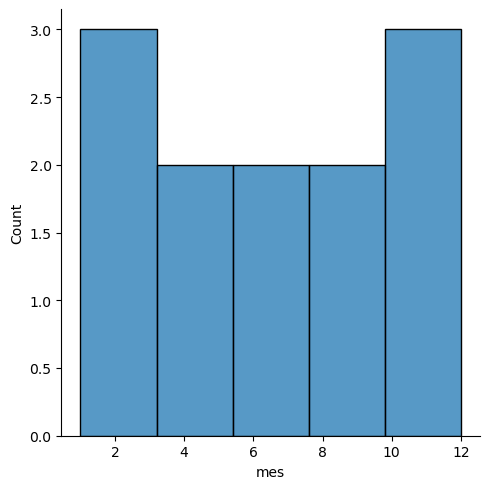

In [20]:
grafico1=sns.displot(tn_cemento_mensual_mendoza['mes']) #Gráfico del valor de la tonelada de cemento. 
grafico1                                                #Podemos ver el mín (20mil) y el max (63mil aprox)

In [21]:
grafico2 = plt.figure()

<Figure size 640x480 with 0 Axes>

In [22]:
#librería + tipo de gráfico + (valores de x, valores de y)
x_values = tn_cemento_mensual_mendoza['mes'].unique() 
x_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [23]:
y_values = tn_cemento_mensual_mendoza['valor'].unique()
y_values

array([45302., 39132., 51026., 47647., 44811., 47649., 57056., 56596.,
       62451., 61378., 59139., 49140.])

<BarContainer object of 12 artists>

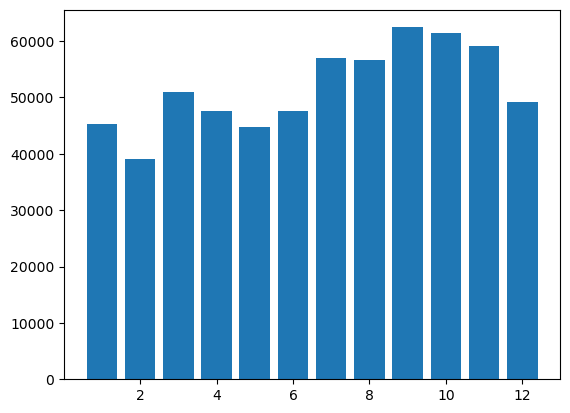

In [24]:
plt.bar(x_values,y_values) #grafico de barras para ver el precio mensual del cemento en mendoza en el 2021

In [25]:
#Estandarizamos la escala del Mes
scaler = StandardScaler() 

In [26]:
reading_scale = scaler.fit_transform(tn_cemento_mensual_mendoza[['mes']])

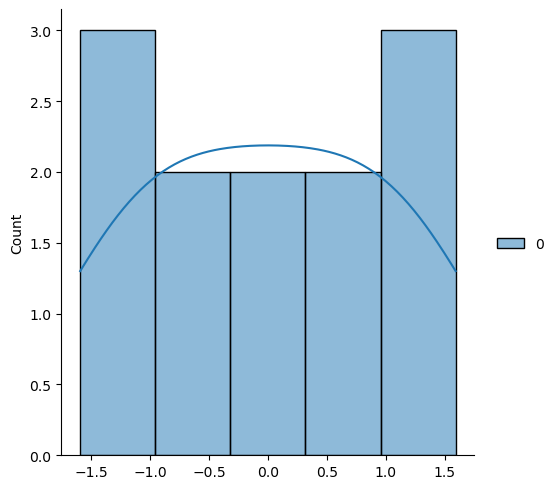

In [27]:
sns.displot(reading_scale, kde=True)

In [28]:
from sklearn.preprocessing import Normalizer

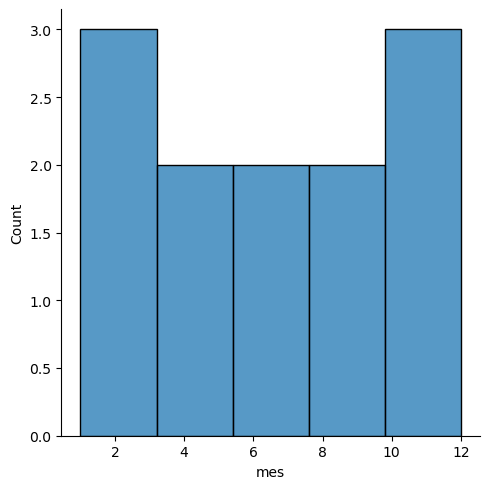

In [29]:
#Normalizamos la escala Mes
sns.displot(tn_cemento_mensual_mendoza['mes'])

In [30]:
normalizer = Normalizer()
normalizer.fit(tn_cemento_mensual_mendoza[['mes']])

Normalizer()

In [31]:
normalizer.transform(tn_cemento_mensual_mendoza[['mes']])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

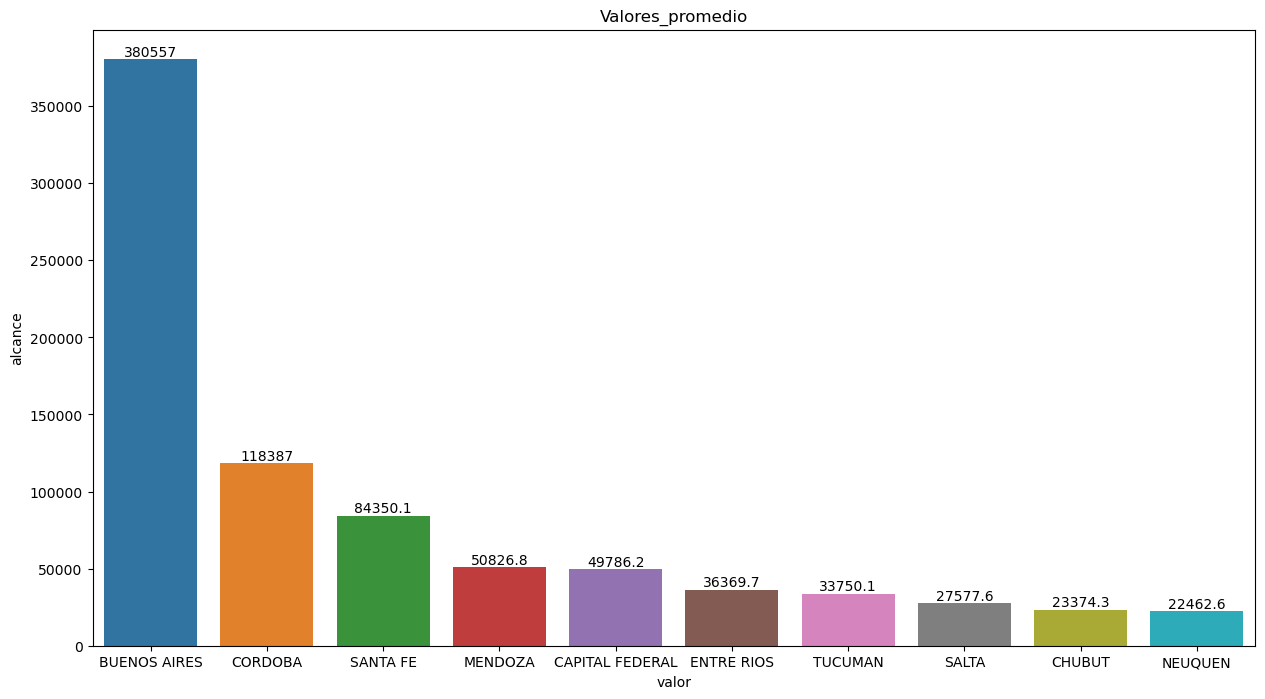

In [32]:
%matplotlib inline
plt.figure(figsize=(15,8))

ax = sns.barplot(data=tn_cemento.groupby('alcance')['valor'].mean().nlargest(10).reset_index(),
                 x='alcance',
                 y = 'valor')

ax.set(xlabel='valor', ylabel='alcance', title = 'Valores_promedio')
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()